In [24]:
import pandas as pd
import sys
sys.path.append("/cbhomes/cychen/work/GTEx/lib")
from tSNR import tsnr, tsnr_pval

#Loading R data

In [25]:
%load_ext rpy2.ipython
from rpy2.robjects.packages import importr
base = importr('Biobase')

In [26]:
%%R
rdata = load("../../../src/gtex_sub/gtex_sub.rdata")
obj = get(rdata)

gtex = assayData(obj)$qsmooth
chromosome = fData(obj)$chr
sex = pData(obj)$gender
tissue = pData(obj)$our_subtype

In [27]:
%Rpull gtex chromosome sex tissue

#Define the function

In [57]:
chr_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', \
            '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y', 'MT']
chr_noxymt = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', \
              '14', '15', '16', '17', '18', '19', '20', '21', '22']
gene_is_on_noxymt = np.array([g in chr_noxymt for g in chromosome])

In [60]:
def male_vs_female(TISSUE=None, verbose=True, overall=False):
    if verbose:
        print TISSUE if TISSUE != None else "All samples"
        print "Chr\ttSNR"
    out = {}
    for CHR in chr_list:
        if TISSUE:
            X = gtex[chromosome == CHR][:, (sex == "MALE")   & (tissue == TISSUE)]
            Y = gtex[chromosome == CHR][:, (sex == "FEMALE") & (tissue == TISSUE)]
        else:
            X = gtex[chromosome == CHR][:, sex == "MALE"]
            Y = gtex[chromosome == CHR][:, sex == "FEMALE"]
        snr = tsnr(X, Y)
        out[CHR] = snr
        if verbose:
            print "Chr%s\t%.2f" % (CHR, snr)
    if overall:
        if TISSUE:
            X = gtex[gene_is_on_noxymt][:, (sex == "MALE")   & (tissue == TISSUE)]
            Y = gtex[gene_is_on_noxymt][:, (sex == "FEMALE") & (tissue == TISSUE)]
            snr = tsnr(X, Y)
            out['Overall'] = snr
            if verbose:
                print "Overall\t%.2f" % (snr)
        else:
            print "Overall tSNR only valid with a tissue!"
    return out

In [30]:
def tSNR_distribution(chr2snr, TITLE=None, XLABEL=True):
    import seaborn as sns
    import pandas as pd
    s = pd.Series(chr2snr).reindex(chr_list)
    ax = s.plot(kind='bar')
    ylabel('tSNR')
    if XLABEL:
        xlabel("Chromosome")
    if TITLE:
        title(TITLE)
    #tight_layout()
    return ax

#Global

In [16]:
pan_tissue = male_vs_female()

All samples
Chr	tSNR
Chr1	4.27
Chr2	4.73
Chr3	4.43
Chr4	4.46
Chr5	4.60
Chr6	4.34
Chr7	4.40
Chr8	4.58
Chr9	4.89
Chr10	4.37
Chr11	4.40
Chr12	4.52
Chr13	5.32
Chr14	4.78
Chr15	4.77
Chr16	4.70
Chr17	4.27
Chr18	5.01
Chr19	4.34
Chr20	5.22
Chr21	4.30
Chr22	5.00
ChrX	10.40
ChrY	190.91
ChrMT	5.25


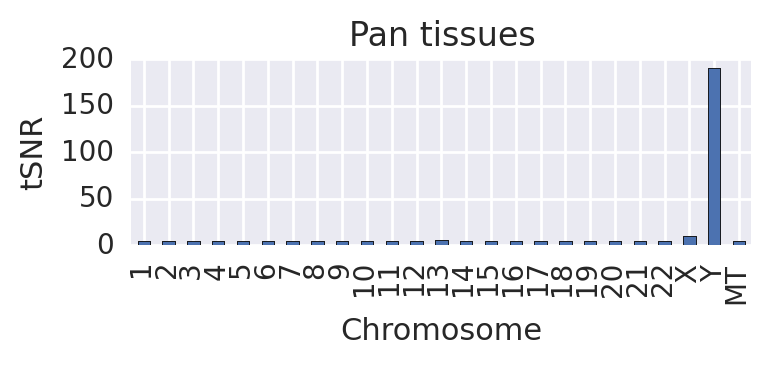

In [17]:
figure(figsize=(4,1.2))
tSNR_distribution(pan_tissue, 'Pan tissues')

#Breast

In [18]:
breast = male_vs_female('breast_mammary_tissue')

breast_mammary_tissue
Chr	tSNR
Chr1	4.51
Chr2	5.36
Chr3	4.54
Chr4	4.55
Chr5	4.21
Chr6	3.86
Chr7	4.17
Chr8	4.17
Chr9	4.21
Chr10	4.29
Chr11	5.04
Chr12	4.52
Chr13	4.08
Chr14	6.48
Chr15	3.84
Chr16	4.29
Chr17	4.75
Chr18	4.19
Chr19	4.38
Chr20	4.60
Chr21	5.08
Chr22	6.81
ChrX	4.98
ChrY	45.46
ChrMT	2.69


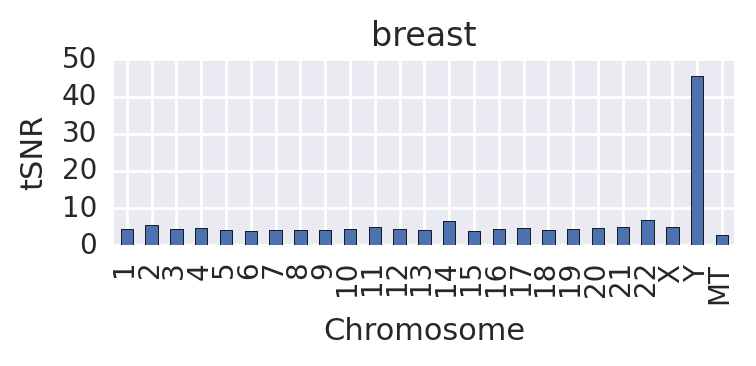

In [19]:
figure(figsize=(4,1.2))
tSNR_distribution(breast, 'breast')

#Stomach

In [20]:
stomach = male_vs_female('stomach')

stomach
Chr	tSNR
Chr1	1.06
Chr2	1.05
Chr3	1.11
Chr4	1.03
Chr5	1.09
Chr6	1.11
Chr7	1.05
Chr8	1.07
Chr9	1.07
Chr10	1.05
Chr11	1.04
Chr12	1.06
Chr13	1.07
Chr14	0.99
Chr15	1.08
Chr16	1.15
Chr17	1.06
Chr18	1.06
Chr19	1.11
Chr20	1.35
Chr21	1.02
Chr22	1.10
ChrX	2.56
ChrY	35.48
ChrMT	0.84


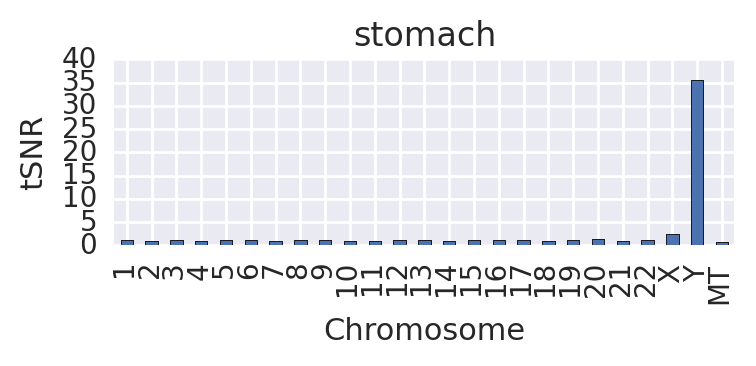

In [21]:
figure(figsize=(4,1.2))
tSNR_distribution(stomach, 'stomach')

#Others

In [65]:
tissue_list = ["adipose_subcutaneous", "adipose_visceral_(omentum)", "adrenal_gland", "artery_aorta", "artery_coronary", \
               "artery_tibial", "brain-0", "brain-1", "brain-2", "breast_mammary_tissue", "cells_ebv-transformed_lymphocytes", \
               "cells_transformed_fibroblasts", "colon_sigmoid", "colon_transverse", "esophagus_gastroesophageal_junction", \
               "esophagus_mucosa", "esophagus_muscularis", "heart_atrial_appendage", "heart_left_ventricle", "liver", "lung", \
               "muscle_skeletal", "nerve_tibial", "pancreas", "pituitary", "skin", "small_intestine_terminal_ileum", "spleen", \
               "stomach", "thyroid", "whole_blood"]

In [66]:
tissue2tsnr = {}
for tiss in tissue_list:
    tissue2tsnr[tiss] = male_vs_female(tiss, verbose=False, overall=True)
df = pd.DataFrame(tissue2tsnr).reindex(chr_list + ['Overall'])

In [67]:
df

,adipose_subcutaneous,adipose_visceral_(omentum),adrenal_gland,artery_aorta,artery_coronary,artery_tibial,brain-0,brain-1,brain-2,breast_mammary_tissue,...,muscle_skeletal,nerve_tibial,pancreas,pituitary,skin,small_intestine_terminal_ileum,spleen,stomach,thyroid,whole_blood
1,1.889666,1.431978,1.200599,1.321040,1.116615,1.383597,2.073603,1.513838,1.389240,4.507879,...,1.671273,1.453146,1.096285,1.098297,2.330716,1.048372,1.163531,1.061698,1.856947,1.335233
2,2.046583,1.684276,1.213127,1.350079,1.127561,1.353152,1.999525,1.499699,1.313340,5.357260,...,1.827089,1.411269,1.198030,1.178503,1.967625,1.008921,1.206628,1.052548,2.187618,1.323318
3,1.965133,1.621897,1.204148,1.289918,1.098913,1.422104,1.930771,1.418957,1.253063,4.538670,...,1.734373,1.441546,1.122351,1.129597,2.210194,1.002392,1.186680,1.114649,1.787314,1.283852
4,2.203568,1.448721,1.261026,1.279909,1.128578,1.503649,1.911206,1.493834,1.307828,4.547661,...,1.607638,1.318329,1.183607,1.201827,2.222106,1.007338,1.140704,1.029818,1.843458,1.310463
5,1.920279,1.484944,1.333268,1.634172,1.234301,1.640696,1.995886,1.520283,1.355615,4.205719,...,1.814818,1.469553,1.194995,1.232062,2.009869,0.981235,1.189396,1.091337,1.831641,1.246237
6,1.899840,1.375447,1.229397,1.361254,1.166361,1.343087,1.989959,1.479274,1.315660,3.860261,...,1.602564,1.283533,1.243255,1.274194,2.071624,1.044419,1.122138,1.106944,1.784277,1.309619
7,1.858045,1.630879,1.217199,1.321060,1.117316,1.475287,1.931269,1.447332,1.226286,4.165468,...,1.799969,1.285367,1.101799,1.284516,1.946389,0.948997,1.190682,1.049449,1.845558,1.260496
8,2.137329,1.410303,1.198693,1.294575,1.120513,1.260678,1.973345,1.459013,1.292418,4.173909,...,1.633875,1.340105,1.122293,1.165473,2.181844,1.131636,1.151912,1.073147,1.761773,1.329061
9,1.997091,1.403617,1.183801,1.306849,1.036337,1.354467,1.898540,1.491286,1.314740,4.207348,...,1.643493,1.426308,1.143501,1.091421,1.953962,1.001429,1.260899,1.066800,1.710168,1.462795
10,2.296546,1.488420,1.178160,1.275909,1.104396,1.329124,1.860456,1.473798,1.299630,4.285320,...,1.739902,1.261854,1.198578,1.114930,1.924623,0.993863,1.186320,1.053785,1.798434,1.299377


To excel (table):

In [68]:
df.to_excel('tSNR_by_chromosome.xlsx')

To pdf (plots):

In [40]:
from matplotlib.backends.backend_pdf import PdfPages
OUTPDF = "tSNR_by_chromosome.pdf"
pdf = PdfPages(OUTPDF)
for tis in tissue_list:
    figure(figsize=(4,2))
    tSNR_distribution(tissue2tsnr[tis], tis)
    subplots_adjust(right=0.98, bottom=0.26, top=0.88)
    pdf.savefig()
    close()
pdf.close()

#Chromosome heatmap

See `figure_DE_and_tSNR.ipynb`.